In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv("../data/auto-mpg.csv")

In [37]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [38]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [32]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [33]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Need to change the type of horsepower and carname from object to numbers so that they can be fed to the neural network.

In [34]:
horsepower_mean = 0.0
data_temp = data[data["horsepower"] != '?']
data_temp["horsepower"] = pd.to_numeric(data_temp["horsepower"])
horsepower_mean = data_temp.horsepower.mean()
def updateHorsepower(x):
    if x == '?':
        x = horsepower_mean
    return float(x)

In [35]:
data.horsepower = data.horsepower.apply(updateHorsepower)

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [39]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [40]:
data['car name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [41]:
data = data.drop(columns=['car name'])

In [42]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [46]:
data_norm = (data - data.min())/(data.max() - data.min())

In [48]:
data_norm.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import loss

In [50]:
y = data_norm.mpg
X = data_norm.drop(columns=['mpg'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [66]:
y_train.shape

(318,)

In [67]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [136]:
def getModel(hiddenLayers=None):
    model = Sequential()
    model.add(Dense(7, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [137]:
model = getModel()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 7)                 56        
                                                                 
 dense_52 (Dense)            (None, 32)                256       
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 8)                 136       
                                                                 
 dense_55 (Dense)            (None, 4)                 36        
                                                                 
 dense_56 (Dense)            (None, 2)                 10        
                                                                 
 dense_57 (Dense)            (None, 1)               

In [138]:
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2)

Epoch 1/300
16/16 [==============================] - 1s 21ms/step - loss: 0.1733 - val_loss: 0.1825
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.1445 - val_loss: 0.1459
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1047 - val_loss: 0.0917
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.0386
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0315 - val_loss: 0.0263
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.0209
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0156
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.0121
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 10/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 11

16/16 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 84/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 85/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0055
Epoch 86/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 87/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0059
Epoch 88/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0055
Epoch 89/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 90/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 91/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 92/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 93/300


16/16 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 165/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0051
Epoch 166/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 167/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 168/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0049
Epoch 169/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0050
Epoch 170/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 171/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0049
Epoch 172/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 173/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0050
Epoc

16/16 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 246/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0051
Epoch 247/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0055
Epoch 248/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 249/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 250/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 251/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0048
Epoch 252/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 253/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0050
Epoch 254/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0047
Epoc

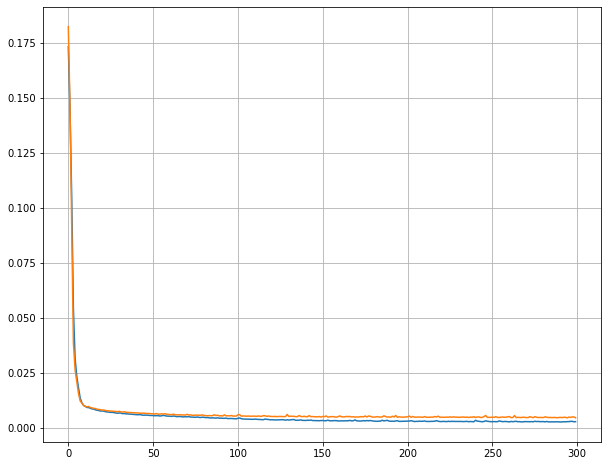

In [139]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()

Looking at the loss, we are going with 100 epochs for the same neural network

In [162]:
model_final = getModel()
model_final.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 0.0483 - val_loss: 0.0164
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.0126
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0096
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0088
Epoch 11

18/18 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0047
Epoch 93/100


In [163]:
prediction = model_final.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [164]:
result = pd.DataFrame({'truth': y_test, 'prediction': np.reshape(prediction, (80,))})

In [165]:
result

,truth,prediction
361,0.436170,0.397992
198,0.638298,0.661841
161,0.186170,0.200725
276,0.335106,0.416222
318,0.553191,0.525405
...,...,...
377,0.585106,0.769024
252,0.271277,0.268031
6,0.132979,0.117766
147,0.398936,0.465811


In [166]:
loss = sum((result.truth-result.prediction)**2)/X_test.shape[0]
print("Final loss is: ", loss)

Final loss is:  0.00999675223547127
